<a href="https://colab.research.google.com/github/GuilleC1987/Modulo2_Tarea1/blob/main/Modulo_2_Tarea1_Guillermo_Canas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [115]:
df = pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## EDA

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [118]:
correlation_matrix = df.corr(numeric_only=True)

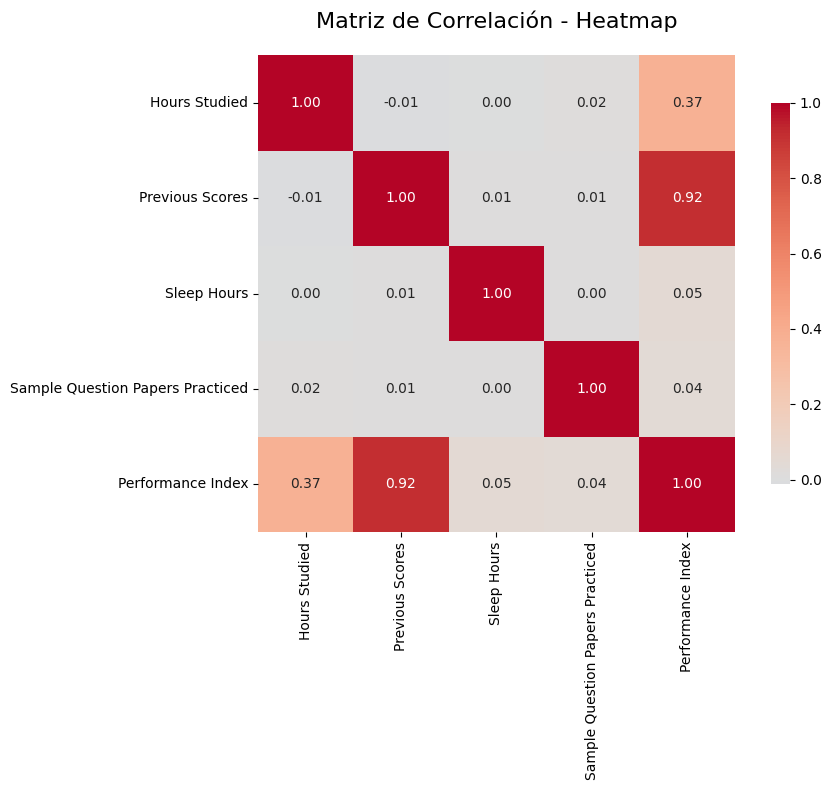

In [119]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,           # Mostrar valores numéricos
            cmap='coolwarm',      # Esquema de colores
            center=0,             # Centrar el color en 0
            square=True,          # Hacer cuadrados las celdas
            fmt='.2f',            # Formato de números (2 decimales)
            cbar_kws={'shrink': 0.8})  # Ajustar barra de color

plt.title('Matriz de Correlación - Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Se muestra alta correlación entre columnas Previous Scores y Perdormance Index.

In [121]:
# El df Student_Performance no cuenta con valores nulos en ninguna de sus columnas. Por lo anterior, no se realiza imputación de datos nulos o eliminación de
# columnas con porcentaje alto de valores nulos
null_values = df.isnull().sum()
null_values

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


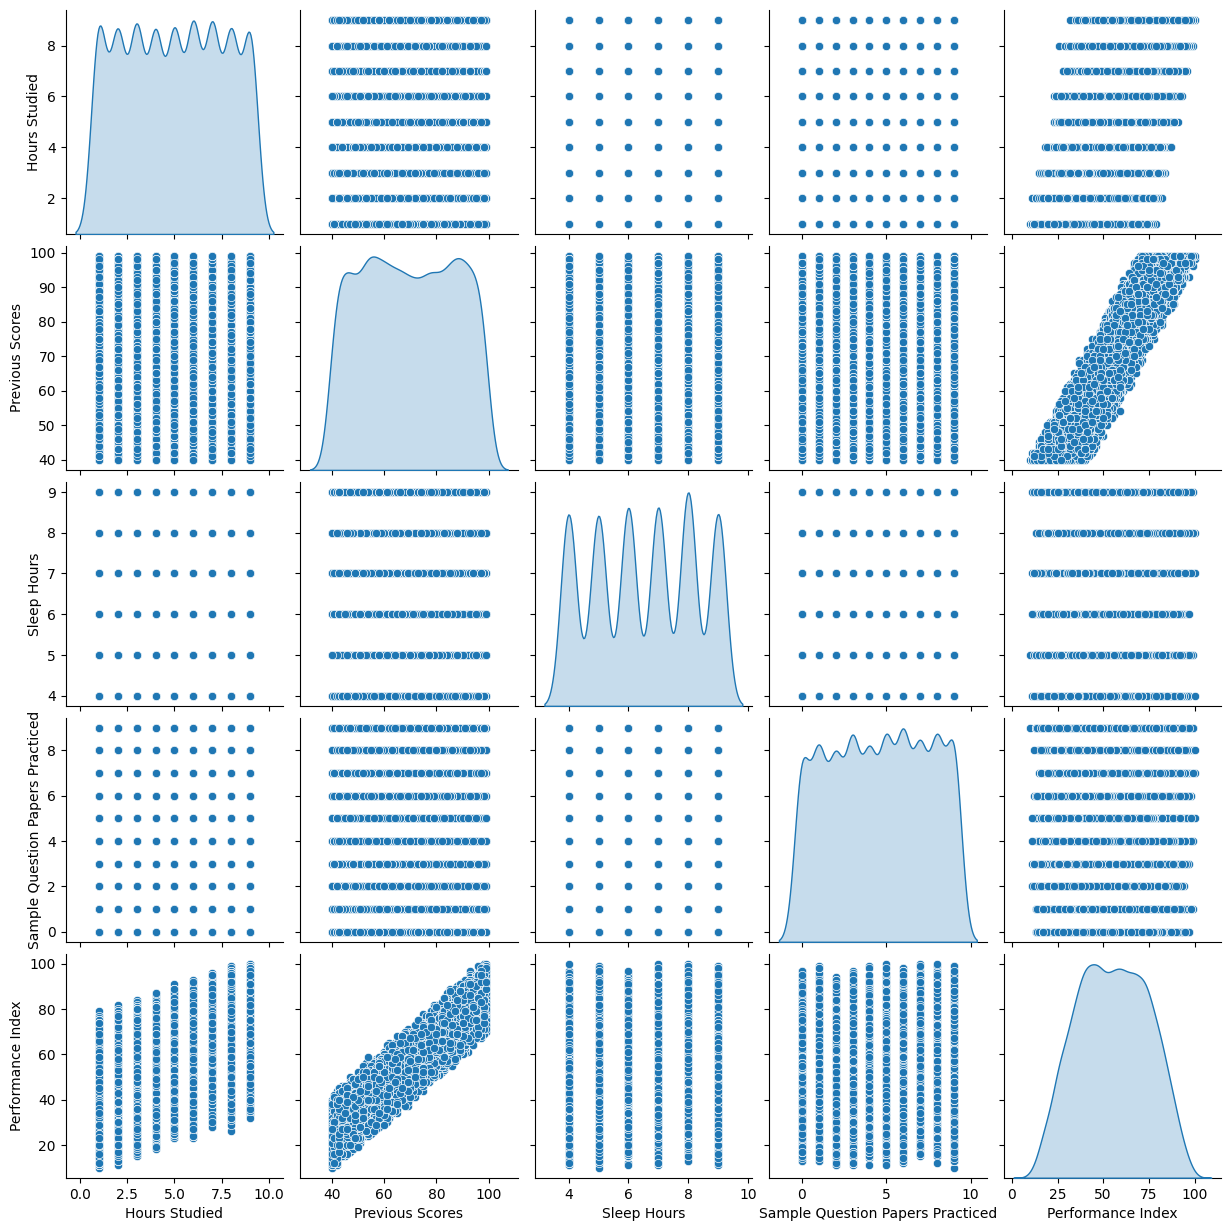

In [122]:
sns.pairplot(df, diag_kind="kde");

In [123]:
#Se dividen las variables que se utilizarán como entrada y se separan de la variable objetivo.
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]

In [124]:
# Se identifican columnas numéricas
numeric_cols = X.select_dtypes(include="number").columns
numeric_cols

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

In [127]:
# Se identifican columnas categóricas. Esta deberá de transformarse en numérica previo al entrenamiento de los modelos de regresión.
categorical_cols = X.select_dtypes(include="object").columns
categorical_cols

Index(['Extracurricular Activities'], dtype='object')

Escalamiento, codificacion

In [129]:
numeric_pipeline = Pipeline(
    steps=[
        ("escalador", StandardScaler())
    ]
)

Feature Engineering. Transformación de variables categóricas a numéricas haciendo uso de  sklearn.preprocessing OneHotEncoder

In [133]:
categorical_pipeline = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ]
)

In [134]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numerico", numeric_pipeline, numeric_cols),
        ("categorico", categorical_pipeline, categorical_cols)
    ]
)

In [200]:
#Se definen los distintos modelos de regresión que serán aplicados en este ejercicio
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
modelo_lineal = LinearRegression()
modelo_ridge = Ridge()
modelo_lasso = Lasso()
modelo_elasticnet = ElasticNet()

Pipeline Modelo Regresión Lineal

In [201]:
#Modelo Regresión Lineal
pipeline_reg_lineal = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", modelo_lineal)
    ]
)

In [202]:
#TRAINING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_reg_lineal.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerico',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('categorico',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('modelo', LinearRegression())])

In [203]:
y_pred = pipeline_reg_lineal.predict(X_test)

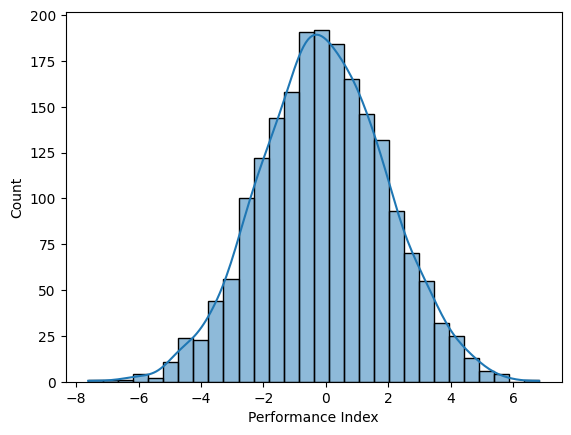

In [204]:
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, bins=30);

In [205]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {MAE}")
print(f"R2: {r2}")

MAE: 1.6111213463123044
R2: 0.9889832909573145


In [206]:
#CROSS - VALIDATION: Modelo de regresión linea
modelo_lineal = LinearRegression()
pipeline_reg_lineal = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", modelo_lineal)
    ]
)

In [207]:
pipeline_reg_lineal

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerico',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('categorico',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('modelo', LinearRegression())])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [209]:
# import KFold
from sklearn.model_selection import KFold

KFold

In [210]:
fold = KFold(n_splits=5, shuffle=True, random_state=42)
fold

KFold(n_splits=5, random_state=42, shuffle=True)

In [211]:
scores_linear = cross_val_score(pipeline_reg_lineal, X_train, y_train, cv=fold, scoring="r2")

In [212]:
scores_linear

array([0.98911669, 0.98893974, 0.98872474, 0.98902582, 0.98748637])

# Pipeline Modelo Ridge

In [213]:
#Modelo Ridge
pipeline_ridge = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", modelo_ridge)
    ]
)

In [214]:
#TRAINING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerico',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('categorico',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('modelo', Ridge())])

In [215]:
y_pred = pipeline_ridge.predict(X_test)

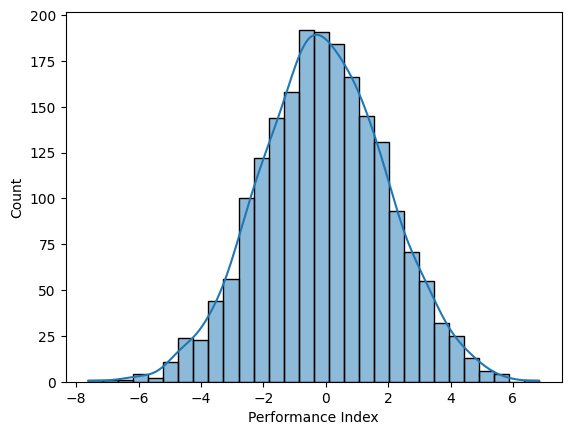

In [216]:
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, bins=30);

In [217]:
MAE_ridge = mean_absolute_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
print(f"MAE: {MAE_ridge}")
print(f"R2: {r2_ridge}")

MAE: 1.61122290875748
R2: 0.9889817152087241


In [218]:
#RIDGE CROSS - VALIDATION
modelo_ridge = Ridge()
pipeline_ridge = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", modelo_ridge)
    ]
)

In [219]:
pipeline_ridge

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerico',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('categorico',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('modelo', Ridge())])

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [221]:
fold = KFold(n_splits=5, shuffle=True, random_state=42)
fold

KFold(n_splits=5, random_state=42, shuffle=True)

In [222]:
scores_ridge = cross_val_score(pipeline_ridge, X_train, y_train, cv=fold, scoring="r2")
scores_ridge

array([0.98911612, 0.9889399 , 0.98872383, 0.98902552, 0.98748785])

# Pipeline modelo Lasso

In [223]:
#Modelo Lasso
pipeline_lasso = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", modelo_lasso)
    ]
)

In [224]:
#TRAINING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerico',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('categorico',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('modelo', Lasso())])

In [225]:
y_pred = pipeline_lasso.predict(X_test)

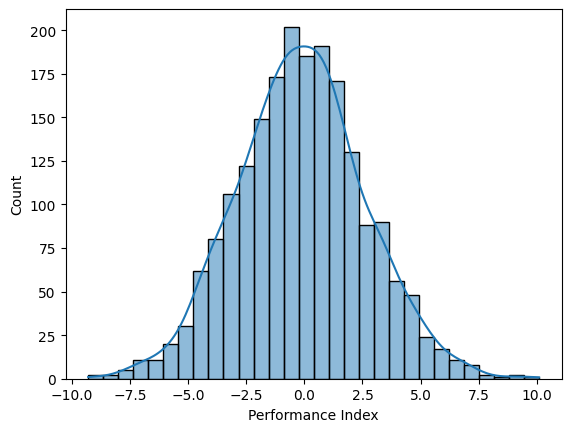

In [226]:
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, bins=30);

In [227]:
MAE_lasso = mean_absolute_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
print(f"MAE: {MAE_lasso}")
print(f"R2: {r2_lasso}")

MAE: 2.168411187650761
R2: 0.9797163665115288


In [228]:
#LASSO CROSS - VALIDATION
modelo_lasso = Lasso()
pipeline_lasso = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", modelo_lasso)
    ]
)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [230]:
fold = KFold(n_splits=5, shuffle=True, random_state=42)
fold

KFold(n_splits=5, random_state=42, shuffle=True)

In [231]:
scores_lasso = cross_val_score(pipeline_lasso, X_train, y_train, cv=fold, scoring="r2")
scores_lasso

array([0.98120619, 0.98142013, 0.98013801, 0.98034355, 0.97860053])

# ElasticNet

In [232]:
#Modelo ElasticNet
pipeline_elasticnet = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", modelo_elasticnet)
    ]
)

In [233]:
#TRAINING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_elasticnet.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerico',
                                                  Pipeline(steps=[('escalador',
                                                                   StandardScaler())]),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('categorico',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('modelo', ElasticNet())])

In [234]:
y_pred = pipeline_elasticnet.predict(X_test)

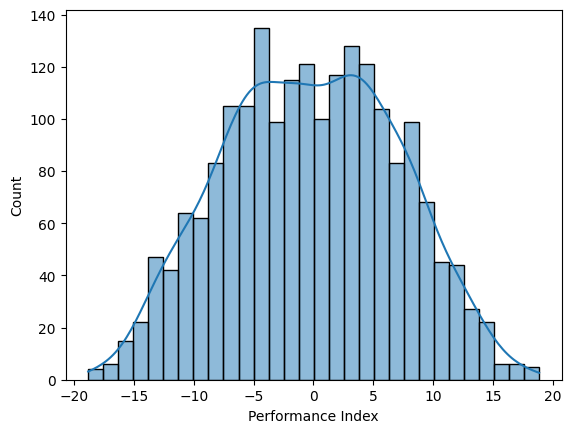

In [235]:
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, bins=30);

In [236]:
MAE_elasticnet = mean_absolute_error(y_test, y_pred)
r2_elasticnet = r2_score(y_test, y_pred)
print(f"MAE: {MAE_elasticnet}")
print(f"R2: {r2_elasticnet}")

MAE: 6.041052462781595
R2: 0.8575590484872346


In [237]:
#ElasticNet CROSS - VALIDATION
modelo_elasticnet = ElasticNet()
pipeline_elasticnet = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", modelo_elasticnet)
    ]
)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [239]:
fold = KFold(n_splits=5, shuffle=True, random_state=42)
fold

KFold(n_splits=5, random_state=42, shuffle=True)

In [240]:
scores_elasticnet = cross_val_score(pipeline_elasticnet, X_train, y_train, cv=fold, scoring="r2")
scores_elasticnet

array([0.86080322, 0.86033503, 0.86091237, 0.85931951, 0.85998306])

In [241]:
df_scores = pd.DataFrame({
    'LinearRegression': scores_linear,
    'Ridge': scores_ridge,
    'Lasso': scores_lasso,
    'ElasticNet': scores_elasticnet
})

In [242]:
df_scores

,LinearRegression,Ridge,Lasso,ElasticNet
0,0.989117,0.989116,0.981206,0.860803
1,0.988940,0.988940,0.981420,0.860335
2,0.988725,0.988724,0.980138,0.860912
3,0.989026,0.989026,0.980344,0.859320
4,0.987486,0.987488,0.978601,0.859983


Para los modelos anteriores y con el fin de evitar el Overfitting se selecciona el modelo ElasticNet, dado que el modelo predice los datos con un r2 alto sin memorizar datos.